In [1]:
import pandas as pd
import numpy as np

In [4]:
# read in everything in data folder
import os
import pandas as pd

# List all files in the data folder
data_folder = 'data'
files = os.listdir(data_folder)

# Read each file into a DataFrame
dfs = []
for file in files:
    if file.endswith('.csv'):
        df = pd.read_csv(os.path.join(data_folder, file))
        dfs.append(df)
combined_df = pd.concat(dfs, ignore_index=True)

In [9]:
combined_df

,Race_DriverNumber,Race_Abbreviation,Race_DriverId,Race_TeamName,Race_TeamId,Race_FirstName,Race_LastName,Race_FullName,Race_Position,Race_ClassifiedPosition,...,Race_Laps,Qual_Position,Qual_Q1,Qual_Q2,Qual_Q3,Year,Round,EventName,Race_BroadcastName,Race_CountryCode
0,5,VET,vettel,Ferrari,ferrari,Sebastian,Vettel,Sebastian Vettel,1.0,1,...,57.0,2.0,0 days 00:01:25.210000,0 days 00:01:23.401000,0 days 00:01:22.456000,2017,1,Australian Grand Prix,NaN,NaN
1,44,HAM,hamilton,Mercedes,mercedes,Lewis,Hamilton,Lewis Hamilton,2.0,2,...,57.0,1.0,0 days 00:01:24.191000,0 days 00:01:23.251000,0 days 00:01:22.188000,2017,1,Australian Grand Prix,NaN,NaN
2,77,BOT,bottas,Mercedes,mercedes,Valtteri,Bottas,Valtteri Bottas,3.0,3,...,57.0,3.0,0 days 00:01:24.514000,0 days 00:01:23.215000,0 days 00:01:22.481000,2017,1,Australian Grand Prix,NaN,NaN
3,7,RAI,raikkonen,Ferrari,ferrari,Kimi,Räikkönen,Kimi Räikkönen,4.0,4,...,57.0,4.0,0 days 00:01:24.352000,0 days 00:01:23.376000,0 days 00:01:23.033000,2017,1,Australian Grand Prix,NaN,NaN
4,33,VER,max_verstappen,Red Bull,red_bull,Max,Verstappen,Max Verstappen,5.0,5,...,57.0,5.0,0 days 00:01:24.482000,0 days 00:01:24.092000,0 days 00:01:23.485000,2017,1,Australian Grand Prix,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4621,99,GIO,giovinazzi,Alfa Romeo Racing,alfa,Antonio,Giovinazzi,Antonio Giovinazzi,16.0,16,...,54.0,14.0,0 days 00:01:37.075000,0 days 00:01:38.248000,NaN,2020,17,Abu Dhabi Grand Prix,A GIOVINAZZI,NaN
4622,6,LAT,latifi,Williams,williams,Nicholas,Latifi,Nicholas Latifi,17.0,17,...,54.0,20.0,0 days 00:01:38.443000,NaN,NaN,2020,17,Abu Dhabi Grand Prix,N LATIFI,NaN
4623,20,MAG,kevin_magnussen,Haas F1 Team,haas,Kevin,Magnussen,Kevin Magnussen,18.0,18,...,54.0,17.0,0 days 00:01:37.863000,NaN,NaN,2020,17,Abu Dhabi Grand Prix,K MAGNUSSEN,NaN
4624,51,FIT,pietro_fittipaldi,Haas F1 Team,haas,Pietro,Fittipaldi,Pietro Fittipaldi,19.0,19,...,53.0,19.0,0 days 00:01:38.173000,NaN,NaN,2020,17,Abu Dhabi Grand Prix,P FITTIPALDI,NaN


In [25]:
combined_df.sort_values(by='Year', ascending=True, inplace=True)

In [26]:
# show all columns
pd.set_option('display.max_columns', None)

In [27]:
target = 'race_position'

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def bin_bin(x, y, bins=10, binning='quantile', ax=None, **scatter_kwargs):
    # Convert to Series for easier handling
    x = pd.Series(x)
    y = pd.Series(y)
    
    # Bin x
    if binning == 'quantile':
        bins_labels = pd.qcut(x, q=bins, duplicates='drop')
    elif binning == 'uniform':
        bins_labels = pd.cut(x, bins=bins)
    else:
        raise ValueError("binning must be 'quantile' or 'uniform'")
    
    # Aggregate to get bin centers & mean y
    bin_stats = pd.DataFrame({'x': x, 'y': y, 'bin': bins_labels})
    grouped = bin_stats.groupby('bin').agg(
        x_center=('x', 'mean'),
        y_mean=('y', 'mean')
    ).reset_index(drop=True)
    
    # Plot
    if ax is None:
        fig, ax = plt.subplots()
    ax.scatter(grouped['x_center'], grouped['y_mean'], **scatter_kwargs)
    ax.set_xlabel('Binned X')
    ax.set_ylabel('Average Y')
    ax.set_title('Binned Scatter Plot')
    
    return ax, grouped  # return grouped for inspection if needed


In [22]:
combined_df.columns

Index(['Race_DriverNumber', 'Race_Abbreviation', 'Race_DriverId',
       'Race_TeamName', 'Race_TeamId', 'Race_FirstName', 'Race_LastName',
       'Race_FullName', 'Race_Position', 'Race_ClassifiedPosition',
       'Race_GridPosition', 'Race_Time', 'Race_Status', 'Race_Points',
       'Race_Laps', 'Qual_Position', 'Qual_Q1', 'Qual_Q2', 'Qual_Q3', 'Year',
       'Round', 'EventName', 'Race_BroadcastName', 'Race_CountryCode'],
      dtype='object')

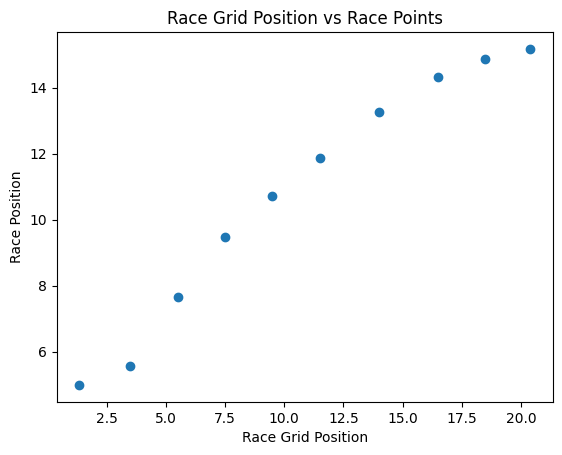

In [29]:
bin_bin(combined_df['Race_GridPosition'], combined_df['Race_Position'])
plt.ylabel('Race Position')
plt.xlabel('Race Grid Position')
plt.title('Race Grid Position vs Race Points')
plt.show()

In [ ]:
bin_bin(combined_df['Qual_Q3'], combined_df[''])
plt.ylabel('Race Position')
plt.xlabel('Race Grid Position')
plt.title('Race Grid Position vs Race Points')
plt.show()